# Target Variable Distribution Analysis

Trying to understand DEP_DELAY's distribution and skewness, and testing different transformations to reduce skewness.

In [86]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [87]:
df = pd.read_csv('../flight-delay-dataset.csv')
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


### Boxplot

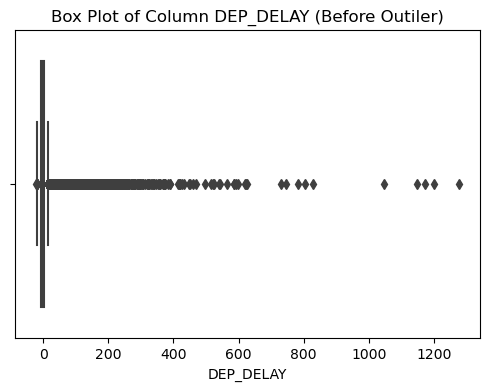

In [88]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['DEP_DELAY'])
plt.title("Box Plot of Column DEP_DELAY (Before Outiler)")
plt.show()

### Transformations (Log or Sqrt)

In [89]:
print('No transformation:', df['DEP_DELAY'].skew())  # If > 0.5 or < -0.5, transformation is needed

df['DEP_DELAY_shifted'] = df['DEP_DELAY'] - df['DEP_DELAY'].min() + 1

df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY_shifted'])  # log1p avoids log(0) issue
print('Log transformation:', df['DEP_DELAY_log'].skew())

df['DEP_DELAY_sqrt'] = np.sqrt(df['DEP_DELAY_shifted']) # sqrt version 
print('Sqrt transformation:', df['DEP_DELAY_sqrt'].skew())

No transformation: 10.686000360165439
Log transformation: 2.1364567117224844
Sqrt transformation: 4.116477440579856


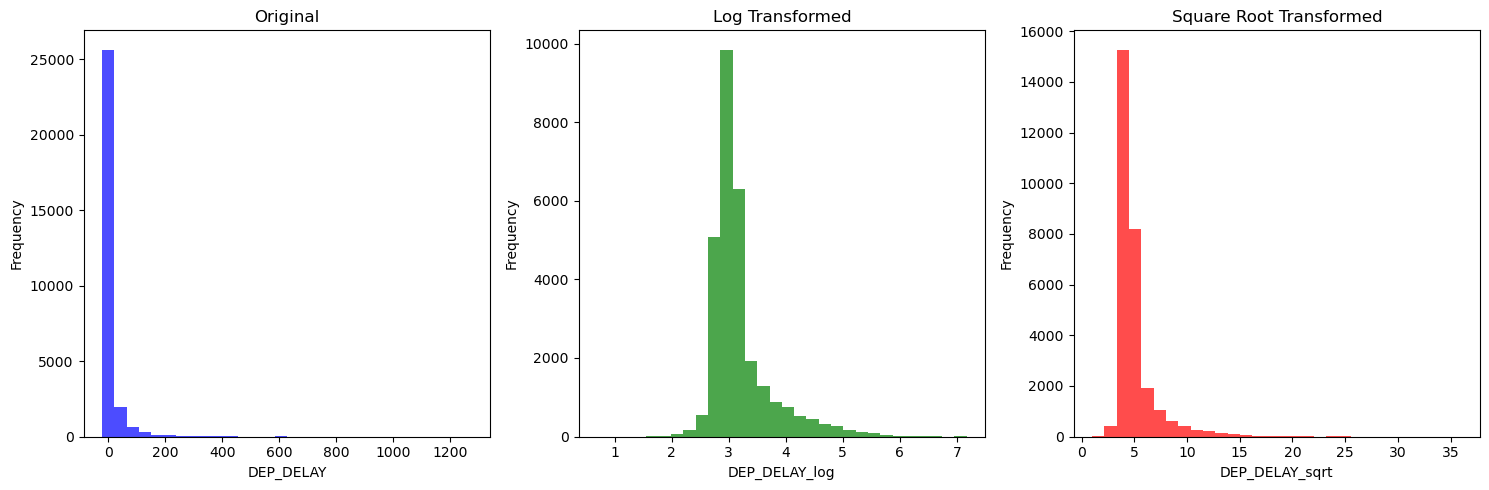

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# print the histograms of the original and transformed data using matplotlib with kde
plt.subplot(1, 3, 1)
plt.hist(df['DEP_DELAY'], bins=30, color='blue', alpha=0.7)
plt.title('Original')
plt.xlabel('DEP_DELAY')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['DEP_DELAY_log'], bins=30, color='green', alpha=0.7)
plt.title('Log Transformed')
plt.xlabel('DEP_DELAY_log')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['DEP_DELAY_sqrt'], bins=30, color='red', alpha=0.7)
plt.title('Square Root Transformed')
plt.xlabel('DEP_DELAY_sqrt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Conclusion 

After viewing the skewness score and distribution, using log transformation has the best potential to produce the most optimal results